### Distribución espacial y máscara

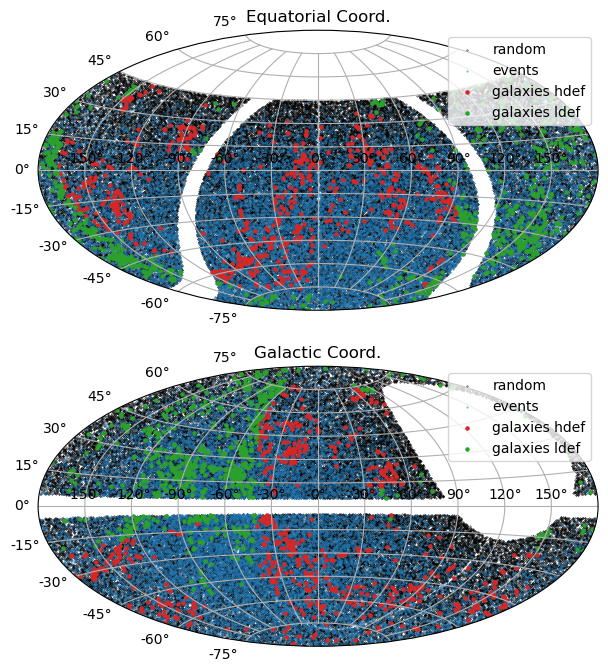

In [4]:
"""
Read data and create Random Catalog
"""
import numpy as np
from astropy.io import ascii
from auger_tools import generate_RandomCatalogue

minsep = 10.
maxsep = 90.
nbins = 15
nmult = 50
npatch = 50

seed1 = 12936
seed2 = 19284

#filename_g = '../data/VLS/2MRSxWISE_VLS.txt'
filename_g = '../data/VLS_ang5_cz_700control_def.txt'
data = ascii.read(filename_g)
data_hdef = data[data['deflection']>25.]
data_ldef = data[data['deflection']<=25.]

filename_e = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename_e)

rand_ra1, rand_dec1 = generate_RandomCatalogue(data['_RAJ2000'],data['_DEJ2000'],\
                                               nmult,seed1)



#import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

gxs_sc_hdef = SkyCoord(data_hdef['_RAJ2000'],data_hdef['_DEJ2000'],frame='icrs',unit='degree')
gxs_sc_ldef = SkyCoord(data_ldef['_RAJ2000'],data_ldef['_DEJ2000'],frame='icrs',unit='degree')

eve_sc = SkyCoord(events_a8['RA'],events_a8['dec'],frame='icrs',unit='degree')
ran_sc = SkyCoord(rand_ra1,rand_dec1,frame='icrs',unit='degree')

#mask_ran = np.where([abs(ran.galactic.b)>5.*(u.degree)])[1]
mask_eve = np.where([abs(eve_sc.galactic.b)>5.*(u.degree)])[1]

eve_sc = eve_sc[mask_eve]
#ran = ran[mask_ran]
ran_sc.ra.wrap_angle=180.*u.degree

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211, projection="aitoff")
ax.scatter(ran_sc.ra.wrap_at(180*u.degree).to(u.rad),ran_sc.dec.to(u.rad),s=.1,c='k',label='random')
ax.scatter(eve_sc.ra.wrap_at(180*u.degree).to(u.rad),eve_sc.dec.to(u.rad),s=.1,label='events')
ax.scatter(gxs_sc_hdef.ra.wrap_at(180*u.degree).to(u.rad),gxs_sc_hdef.dec.to(u.rad),s=5,c='C03',label='galaxies hdef')
ax.scatter(gxs_sc_ldef.ra.wrap_at(180*u.degree).to(u.rad),gxs_sc_ldef.dec.to(u.rad),s=5,c='C02',label='galaxies ldef')

ax.legend(loc=1)
ax.set_title('Equatorial Coord.')
ax.grid(True)

ax1 = fig.add_subplot(212, projection="aitoff")
ax1.scatter(ran_sc.galactic.l.wrap_at(180*u.degree).to(u.rad),ran_sc.galactic.b.to(u.rad),s=.1,c='k',label='random')
ax1.scatter(eve_sc.galactic.l.wrap_at(180*u.degree).to(u.rad),eve_sc.galactic.b.to(u.rad),s=.1,label='events')
ax1.scatter(gxs_sc_hdef.galactic.l.wrap_at(180*u.degree).to(u.rad),gxs_sc_hdef.galactic.b.to(u.rad),s=5,c='C03',label='galaxies hdef')
ax1.scatter(gxs_sc_ldef.galactic.l.wrap_at(180*u.degree).to(u.rad),gxs_sc_ldef.galactic.b.to(u.rad),s=5,c='C02',label='galaxies ldef')
ax1.legend(loc=1)
ax1.set_title('Galactic Coord.')
ax1.grid(True)

plt.savefig('../plots/presentacion1.png')
plt.show()

### Ver cuantiles de luminosidad

Sample file: ../data/VLS/2MRSxWISE_VLS_passivecrop.txt


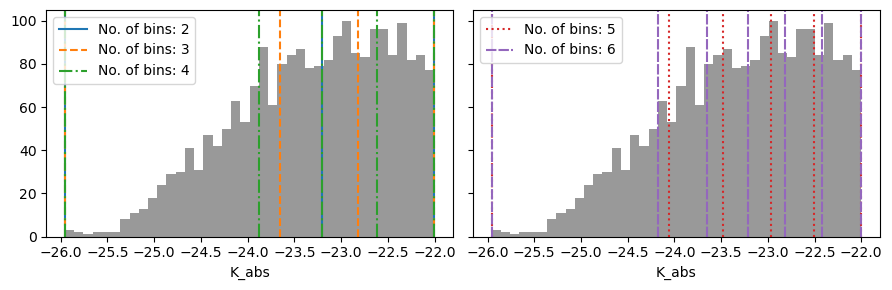

In [89]:
import numpy as np
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import astropy.units as u
from auger_tools import generate_RandomCatalogue
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

sample = 'passivecrop'
nquant = 6

# Read UHECR
filename_e = '../data/Auger/events_a8_lb.dat'
events_a8 = ascii.read(filename_e)
# Galaxy Mask
eve = SkyCoord(events_a8['RA'],events_a8['dec'],frame='icrs',unit='degree')
mask_eve = np.where([abs(eve.galactic.b)>5.*(u.degree)])[1]
events_a8 = events_a8[mask_eve]

# Read Gxs
if sample=='passivecrop': filename_g = '../data/VLS/2MRSxWISE_VLS_passivecrop.txt'
elif sample=='sinAGNWISE': filename_g = '../data/2MRSxWISE_VLS_d1d5_sinAGNWISE.txt'
elif sample=='sinAGNWISEniBPT': filename_g = '../data/2MRSxWISE_VLS_d1d5_sinAGNWISEniBPT.txt'
else: filename_g = '../data/VLS/2MRSxWISE_VLS.txt'
print('Sample file:',filename_g)
gxs = ascii.read(filename_g)

colors = ['C00','C01','C02','C03','C04']
fmts = ['-','--','-.',':',(0, (5, 1))]

fig, ax = plt.subplots(1,2,sharey=True,figsize=(9,3))

ax[0].hist(gxs['K_abs'],bins=40,histtype='stepfilled',lw=3,color='k',alpha=.4)
ax[1].hist(gxs['K_abs'],bins=40,histtype='stepfilled',lw=3,color='k',alpha=.4)

# Quantiles
for nquant,c,fmt in zip([2,3,4],colors,fmts):
  quantiles = np.quantile(gxs['K_abs'],np.linspace(0,1,nquant+1))

  data = []

  for q in range(nquant):
    data.append(

      gxs[(gxs['K_abs']>quantiles[q])&(gxs['K_abs']<quantiles[q+1])]

    )
  #print(nquant, quantiles)

  for q in quantiles:
      lines = ax[0].axvline(q,ls=fmt,c=c,label=f'Num. of bins: {nquant}')

#Legend
lines = [Line2D([0], [0], color=colors[i], linestyle=fmts[i]) for i in [0,1,2]]
labels = [f'No. of bins: {i+2}' for i in [0,1,2]]
ax[0].legend(lines, labels,loc=2)

for nquant,c,fmt in zip([5,6],colors[-2:],fmts[-2:]):
  quantiles = np.quantile(gxs['K_abs'],np.linspace(0,1,nquant+1))

  data = []

  for q in range(nquant):
    data.append(

      gxs[(gxs['K_abs']>quantiles[q])&(gxs['K_abs']<quantiles[q+1])]

    )
  #print(nquant, quantiles)

  for q in quantiles:
      lines = ax[1].axvline(q,ls=fmt,c=c,label=f'Num. of bins: {nquant}')

#Legend
lines = [Line2D([0], [0], color=colors[i], linestyle=fmts[i]) for i in [3,4]]
labels = [f'No. of bins: {i+2}' for i in [3,4]]
ax[1].legend(lines, labels,loc=2)




ax[0].set_xlabel('K_abs')
ax[1].set_xlabel('K_abs')
plt.tight_layout()
plt.savefig('../plots/presentacion2.png')

plt.show()

### Bootstrap correlations

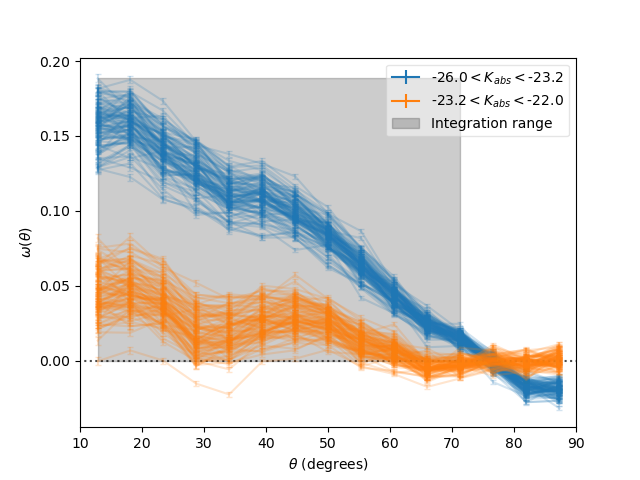

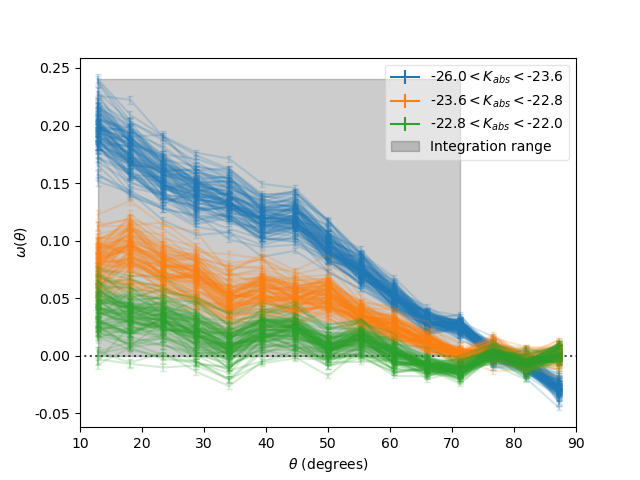

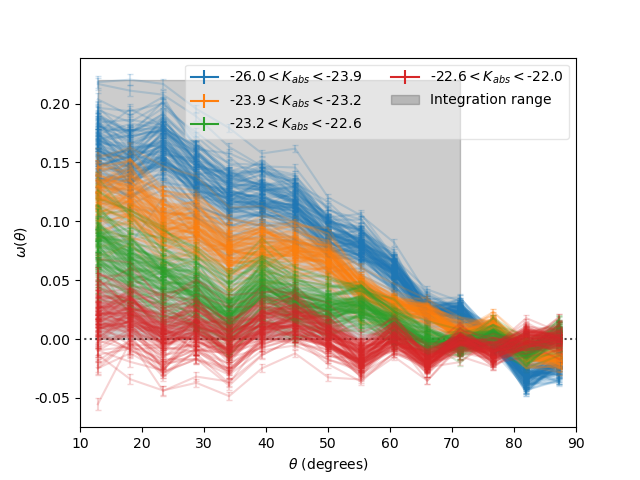

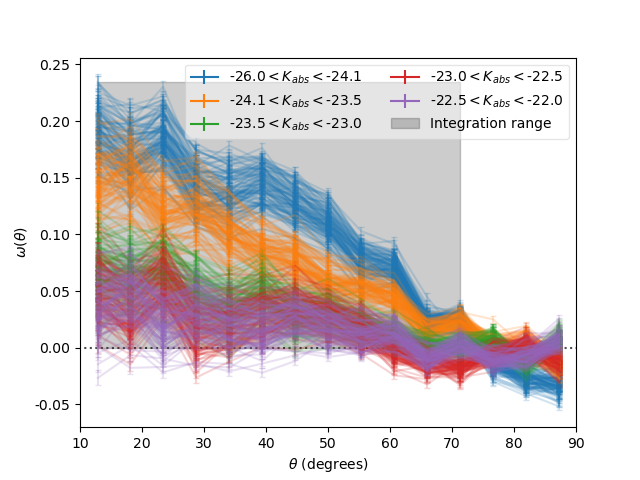

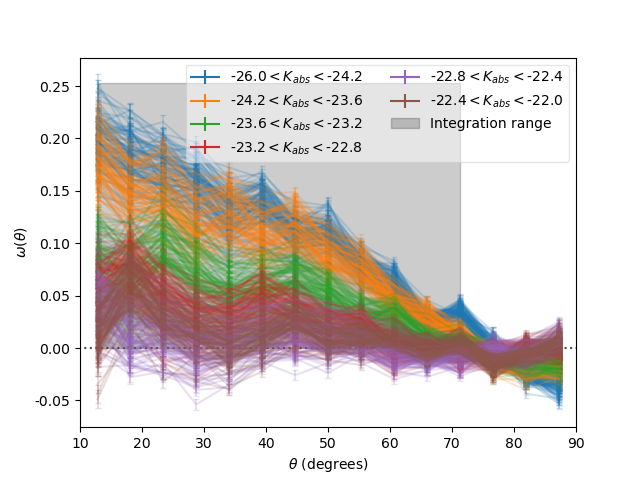

In [88]:
from IPython.display import Image
from IPython.display import display

for i in [2,3,4,5,6]:
    display(Image(f'../plots/cross_treecorr_nq{i}_nmult50_nbs100_passivecrop.png'))

### Ratios plot

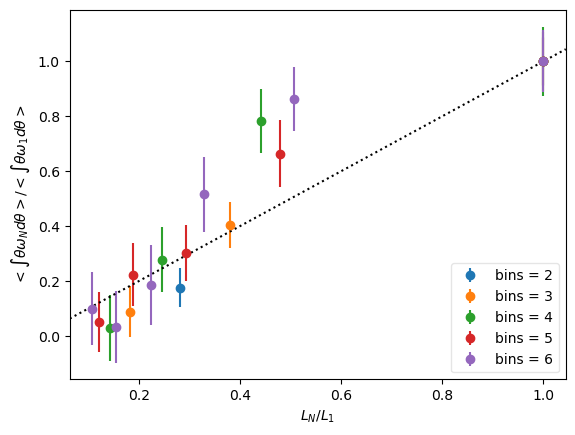

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

fig, ax = plt.subplots()

sample = 'passivecrop'
nbootstrap = 100
names = ['int_ratio','L_ratio','int_std']
colors = ['C00','C01','C02','C03','C04','C05']
labels = ['bins = 2','bins = 3','bins = 4','bins = 5','bins = 6']
nquants = [2,3,4,5,6]

for nquant,c in zip(nquants,colors[:len(nquants)]):
    filename = f'../data/int_L_nq{nquant}_nbs{nbootstrap}_{sample}.npz'
    data = ascii.read(filename)#,names=names)
    ax.errorbar(data['L_ratio'],data['int_ratio'],yerr=data['int_std'],c=c,fmt='o')

ax.axline((1,1),slope=1,c='k',ls=':')
ax.set_ylabel(r'$<\int\theta\omega_Nd\theta>/<\int\theta\omega_1d\theta>$')
ax.set_xlabel(r'$L_N/L_1$')

#Legend
handles = [plt.errorbar([],[],yerr=1,color=colors[:len(nquants)][i],fmt='o') \
           for i in range(len(nquants))]#,\
labels_ = labels[:len(nquants)]
plt.legend(handles, labels_, loc=4, fancybox=True, framealpha=0.5)

plotname = f'int_L_nquant{nquant}_{sample}.png'
plt.savefig('../plots/'+plotname)
plt.savefig('../plots/'+'presentacion8.png')

plt.show()

### AGN effect

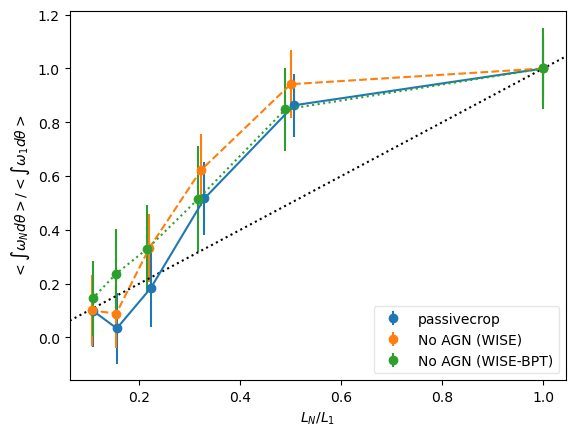

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

fig, ax = plt.subplots()

nbootstrap = 100
samples = ['passivecrop','sinAGNWISE','sinAGNWISEniBPT']
colors = ['C00','C01','C02']
labels = ['passivecrop','No AGN (WISE)','No AGN (WISE-BPT)']
fmts = ['o-','o--','o:']
nquant = 6

for sample,c,fmt in zip(samples,colors,fmts):
    filename = f'../data/int_L_nq{nquant}_nbs{nbootstrap}_{sample}.npz'
    data = ascii.read(filename)#,names=names)
    ax.errorbar(data['L_ratio'],data['int_ratio'],yerr=data['int_std'],c=c,fmt=fmt)

ax.axline((1,1),slope=1,c='k',ls=':')
ax.set_ylabel(r'$<\int\omega_Nd\theta>/<\int\omega_1d\theta>$')
ax.set_xlabel(r'$L_N/L_1$')

#Legend
handles = [plt.errorbar([],[],yerr=1,color=colors[i],fmt='o') \
           for i in range(len(samples))]#,\
#labels_ = labels[:len(nquants)]
plt.legend(handles, labels, loc=4, fancybox=True, framealpha=0.5)

plotname = f'int_L_nquant{nquant}_AGNcomparison.png'
#plt.savefig('../plots/'+plotname)
plt.savefig('../plots/'+'presentacion9.png')

plt.show()